## Breif Look at the Dataset

In [1]:
import pandas as pd
titanic_data = pd.read_csv("train.csv")

In [2]:
titanic_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mellinger, Miss. Madeleine Violet",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* Note: We can see right away that the data set contains 891 passangers; however, only **714** of these passangers have their age logged, **204** have their cabin number logged, and **889** have where they embarked on.

* Possible **COA** (Course of Action):
  - Categorical:
    - **(Sex)** SimpleImputer using ** *most_frequent* ** to catch all missing sex features in the test set, and use OrdinalEncoder to transform the sex from strings to 1's and 0's
    - **(Cabin)** Drop Cabin feature since less than 25% of the data has the cabin column logged.
    - **(Embarked)** SimpleImputer using ** *most_frequent* ** to catch all missing embarked feature in the test set, and user OneHotEncoder to transform "C", "S", and "Q" to three seperate features
    - **(Ticket)** Use SimpleImputer and OrdinalEncoder
    - **(Name)** Split into two features (Title : Last Name) , then use SimpleImputer and OrdinalEncoder
  - Numerical:
    - **(Pclass, Age, SibSp, Parch, Fare)** SimpleImputer using ** *mean* **
    - (PassengerID) has no meaning to the dataset

In [3]:
import TitanicPipeline
pipeline = TitanicPipeline.TitanicPipeline(using_neural_net=False)
preprocessed_titanic_data = pipeline.fit_transform(titanic_data)

NameError: name 'string' is not defined

In [4]:
columns = pipeline.categories

In [5]:
preprocessed_titanic_data_df = pd.DataFrame(preprocessed_titanic_data,columns=columns)

In [6]:
preprocessed_titanic_data_df.describe(include="all")

,Pclass,SibSp,Parch,Fare,C,Q,S,LastName_0,LastName_1,LastName_2,...,LastName_7,Title_0,Title_1,Title_2,Title_3,Title_4,Age > 5,Ticket,Sex,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.065376,0.063599,0.062858,0.188552,0.086420,0.725028,0.103255,0.127946,0.123457,...,0.125701,0.012346,0.005612,0.205387,0.194164,0.582492,0.950617,0.497836,0.647587,0.383838
std,0.418036,0.137843,0.134343,0.096995,0.391372,0.281141,0.446751,0.304462,0.334217,0.329146,...,0.331699,0.110485,0.074743,0.404211,0.395778,0.493425,0.216787,0.295369,0.477990,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.233088,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.495588,1.000000,0.000000
75%,1.000000,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.763971,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


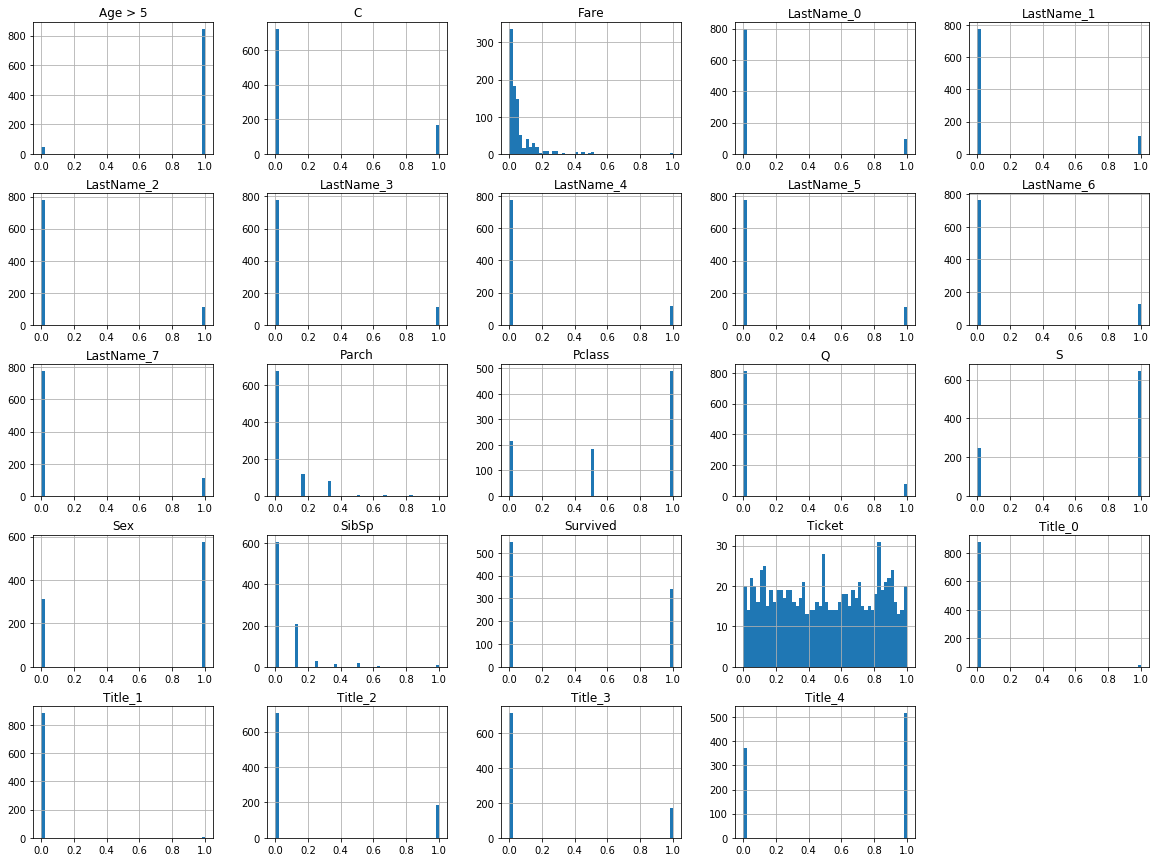

In [7]:
import matplotlib.pyplot as plt
preprocessed_titanic_data_df.hist(bins=50,figsize=(20,15))
plt.show()

* Note: The ranges for these features vary pretty heavily (Age : [0,80] , PassengerId : [0,800]). We can obviously benefit from some form of **feature scaling**.

## Discover Correlations

In [8]:
corr_matrix = preprocessed_titanic_data_df.corr()

In [9]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived      1.000000
Title_3       0.336036
Title_2       0.329948
Fare          0.257307
C             0.168240
LastName_1    0.105310
Parch         0.081629
Title_0       0.037155
LastName_4    0.033443
LastName_7    0.027916
LastName_2    0.019487
Q             0.003650
Title_1       0.002496
LastName_0   -0.025128
SibSp        -0.035322
LastName_3   -0.039177
LastName_6   -0.039737
LastName_5   -0.083467
S            -0.149683
Age > 5      -0.150304
Ticket       -0.164549
Pclass       -0.338481
Sex          -0.543351
Title_4      -0.548524
Name: Survived, dtype: float64